<a href="https://colab.research.google.com/github/Anshika102005/Machine-Learning-/blob/main/IPL_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('IPL_dataset.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [4]:
df.shape

(74, 20)

In [5]:
print(f"your rows are{df.shape[0]} and your columns are {df.shape[1]}")

your rows are74 and your columns are 20


In [6]:
 df.isnull().sum() #we calculate the single of the null data

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,0
toss_decision,0
first_ings_score,0
first_ings_wkts,0


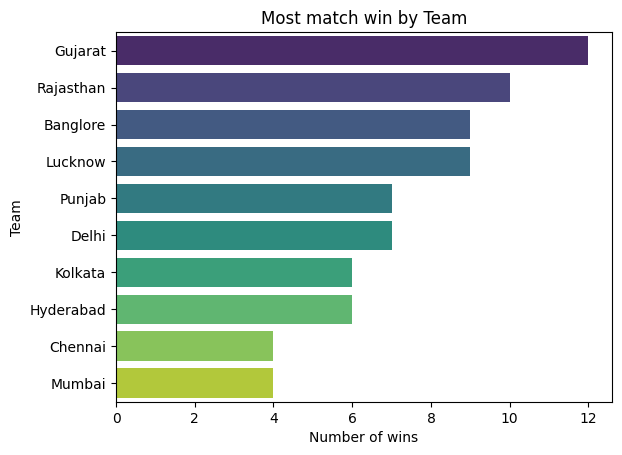

In [7]:
df['match_winner'].value_counts()
match_wins = df['match_winner'].value_counts()
sns.barplot(y=match_wins.index, x=match_wins.values, palette = "viridis")
plt.title("Most match win by Team")
plt.xlabel("Number of wins")
plt.ylabel("Team")
plt.show()

#type(df.['match_winner'].value_counts()) #we can see who is the winner

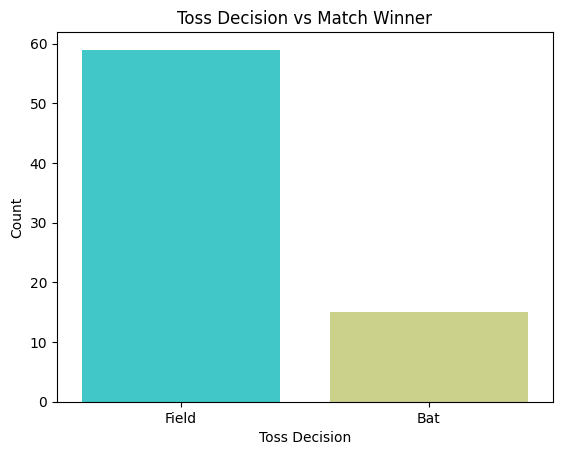

In [8]:
#Toss Decision vs Match Winner most of the choose fielding not batting
sns.countplot(x = df['toss_decision'], palette="rainbow")
plt.title("Toss Decision vs Match Winner")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.show()

In [9]:
#Toss Winner vs Match Winner
#kya toss jitne ke baad match jet paa rahi hai
df[df['toss_winner'] == df['match_winner']]
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
#74 teams me se 36 team match jeete and toss winner bhi rahe
#percentage of winning both
percentage = (count * 100)/df.shape[0]
print(percentage.round(2)) #only 2 decimal points

48.65


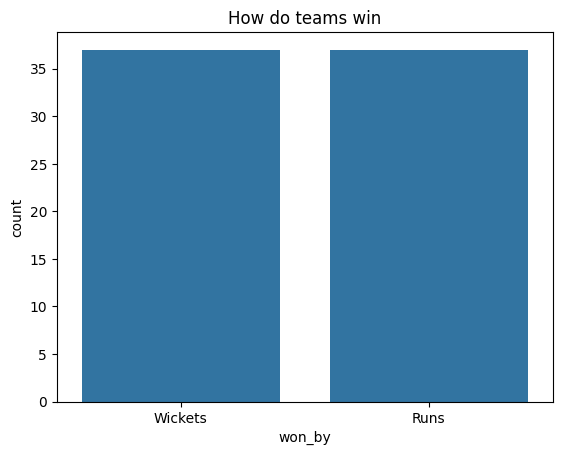

In [10]:
 #How do teams win?(Runs vs Wickets)
 sns.countplot(x=df['won_by'])
 plt.title("How do teams win")
 plt.show()

In [11]:
#Most player of the match award
count = df['player_of_the_match'].value_counts().head(10)# top 10
print(count)

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64


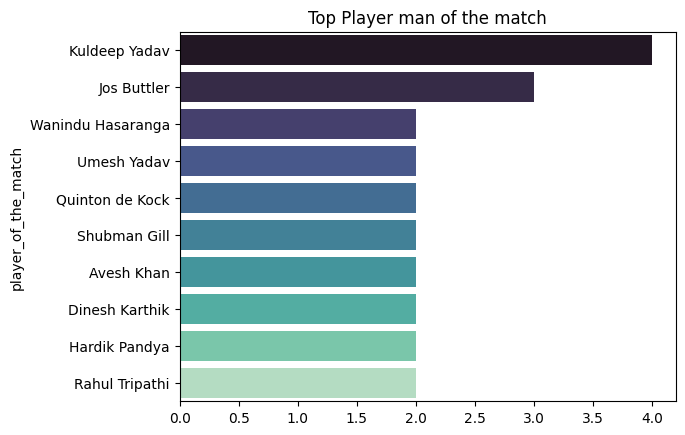

In [12]:
sns.barplot(x = count.values, y=count.index, palette = "mako")
plt.title("Top Player man of the match")
plt.show()

In [13]:
# two top score
# top_score, highscore two columns
# using groping methods
df = pd.read_csv('IPL_dataset.csv')
high= df.groupby('top_scorer')['highscore'].sum().sort_values(ascending = False)
high

,highscore
top_scorer,
Jos Buttler,651
Quinton de Kock,377
KL Rahul,351
Shubman Gill,288
Faf du Plessis,257
Liam Livingstone,239
David Warner,213
W. Saha,190
Ishan Kishan,180


In [14]:
#for 2 top score
high= df.groupby('top_scorer')['highscore'].sum().sort_values(ascending = False).head(5)
high

,highscore
top_scorer,
Jos Buttler,651
Quinton de Kock,377
KL Rahul,351
Shubman Gill,288
Faf du Plessis,257


<Axes: xlabel='top_scorer'>

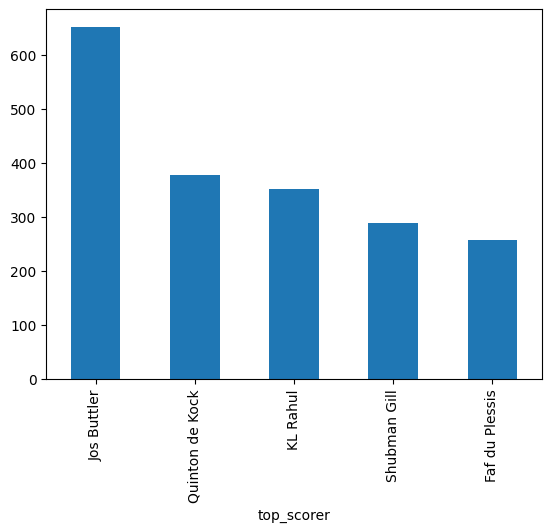

In [15]:
high.plot(kind = 'bar') # horizontal = barh

In [16]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0])
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


In [17]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x:x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
top_bowlers = df.groupby('best_bowling_figure')['highest_wickets'].sum().sort_values(ascending = False)
top_bowlers

,highest_wickets
best_bowling_figure,
3--22,15
3--20,9
3--25,9
4--24,8
4--28,8
4--30,8
4--33,8
4--20,8
3--28,6


<Axes: ylabel='top_scorer'>

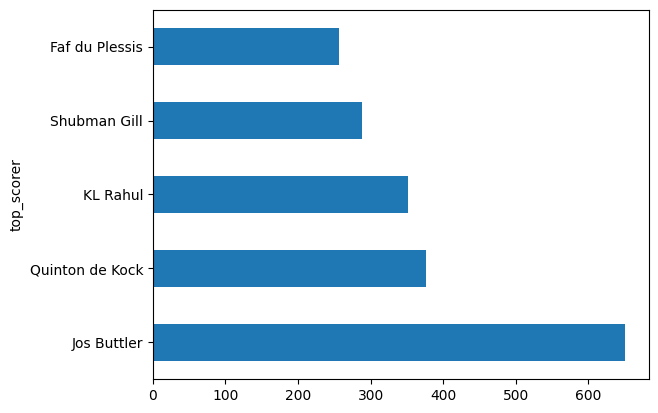

In [18]:
high.plot(kind = 'barh')

<Axes: xlabel='best_bowling_figure'>

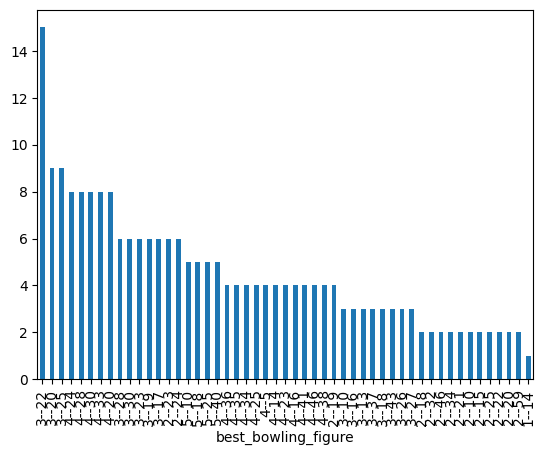

In [19]:
top_bowlers.plot(kind = 'bar')

In [20]:
#venue count
venue_count = df['venue'].value_counts()
venue_count

,count
venue,
"Wankhede Stadium, Mumbai",21
"Dr DY Patil Sports Academy, Mumbai",20
"Brabourne Stadium, Mumbai",16
"Maharashtra Cricket Association Stadium,Pune",13
"Eden Gardens, Kolkata",2
"Narendra Modi Stadium, Ahmedabad",2


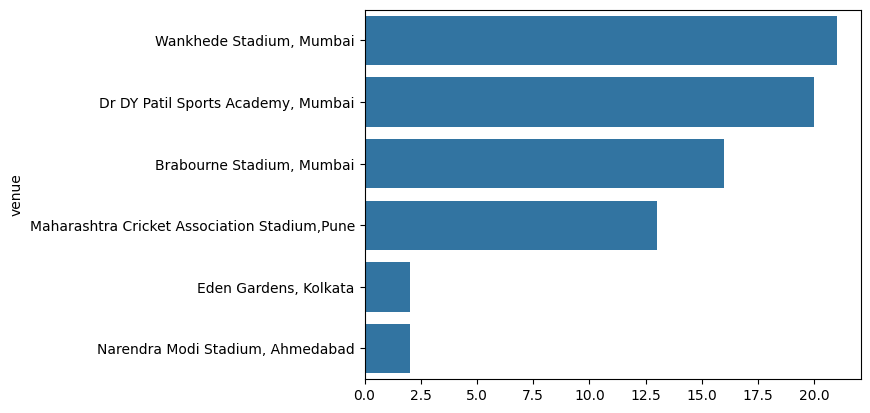

In [21]:
sns.barplot(y = venue_count.index, x =venue_count.values)
plt.show()

In [22]:
#who won the highest margin by runs
df[df['won_by'] == 'Runs'].sort_values(by= 'margin', ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


In [23]:
# Which player had the highest individual score
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140
